<a href="https://colab.research.google.com/github/veroggg79/AMORTIZATIONS/blob/main/section1_oop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sección 1: Programación Orientada a Objetos

# 1.1.0. Conceptos generales

**Clase**: Colección lógica de atributos y métodos

**Objeto**: Instancia de una clase

# 1.1.1. Ejemplo: Modelando un préstamo

Para entender la diferencia entre clase y objeto, supongamos queremos modelar un préstamo. Todos los préstamos, tienen características o una estructura lógica similar: todos tienen una cantidad a prestar, una tasa de interés y un término a meses o años. Bajo ésta lógica:


**Clase:** Préstamo como concepto general (con sus caractéristicas y estructura lógica común), ya que describe cómo se construye y se determina un préstamo.

**Objeto (instancia de la clase):** Cualquier préstamo en particular, por ejemplo un crédito de libre inversión de 1'000.000 COP a 1 año con una tasa del 20% E.A.

# 1.2.0. Estructura de una clase

A una clase la definen sus métodos y sus atributos. Los atributos son los adjetivos o propiedades que tiene y los métodos las funciones o acciones que se pueden realizar por la clase misma.

# 1.2.1. Ejemplo: Clase Préstamo

```
Clase Préstamo:
    Atributos:
        - Cantidad a prestar
        - Tasa de interés
        - Tiempo del préstamo
        - Divisa
    Métodos (verbos - acciones):
        - Obtener pago mensual
        - Obtener pago total
        - Pagar
```

# 1.2.2. Ejemplo: Objeto de la clase Préstamo

Una instancia de la clase Préstamo u objeto de la clase Préstamo se puede construir dando valor a sus atributos, en este caso, consideremos un préstamo de 1'000.000 COP, prestado a una tasa del 20% E.A. a término de 1 año.

`prestamo = nuevo Préstamo(Cantidad a prestar = 1000000, Tasa de Interés = 20, Tiempo del préstamo = 1 (años), Divisa = "COP")`

# 1.2.2.1. Implementemos ahora la clase en Python (interés simple con fórmula de amortización)

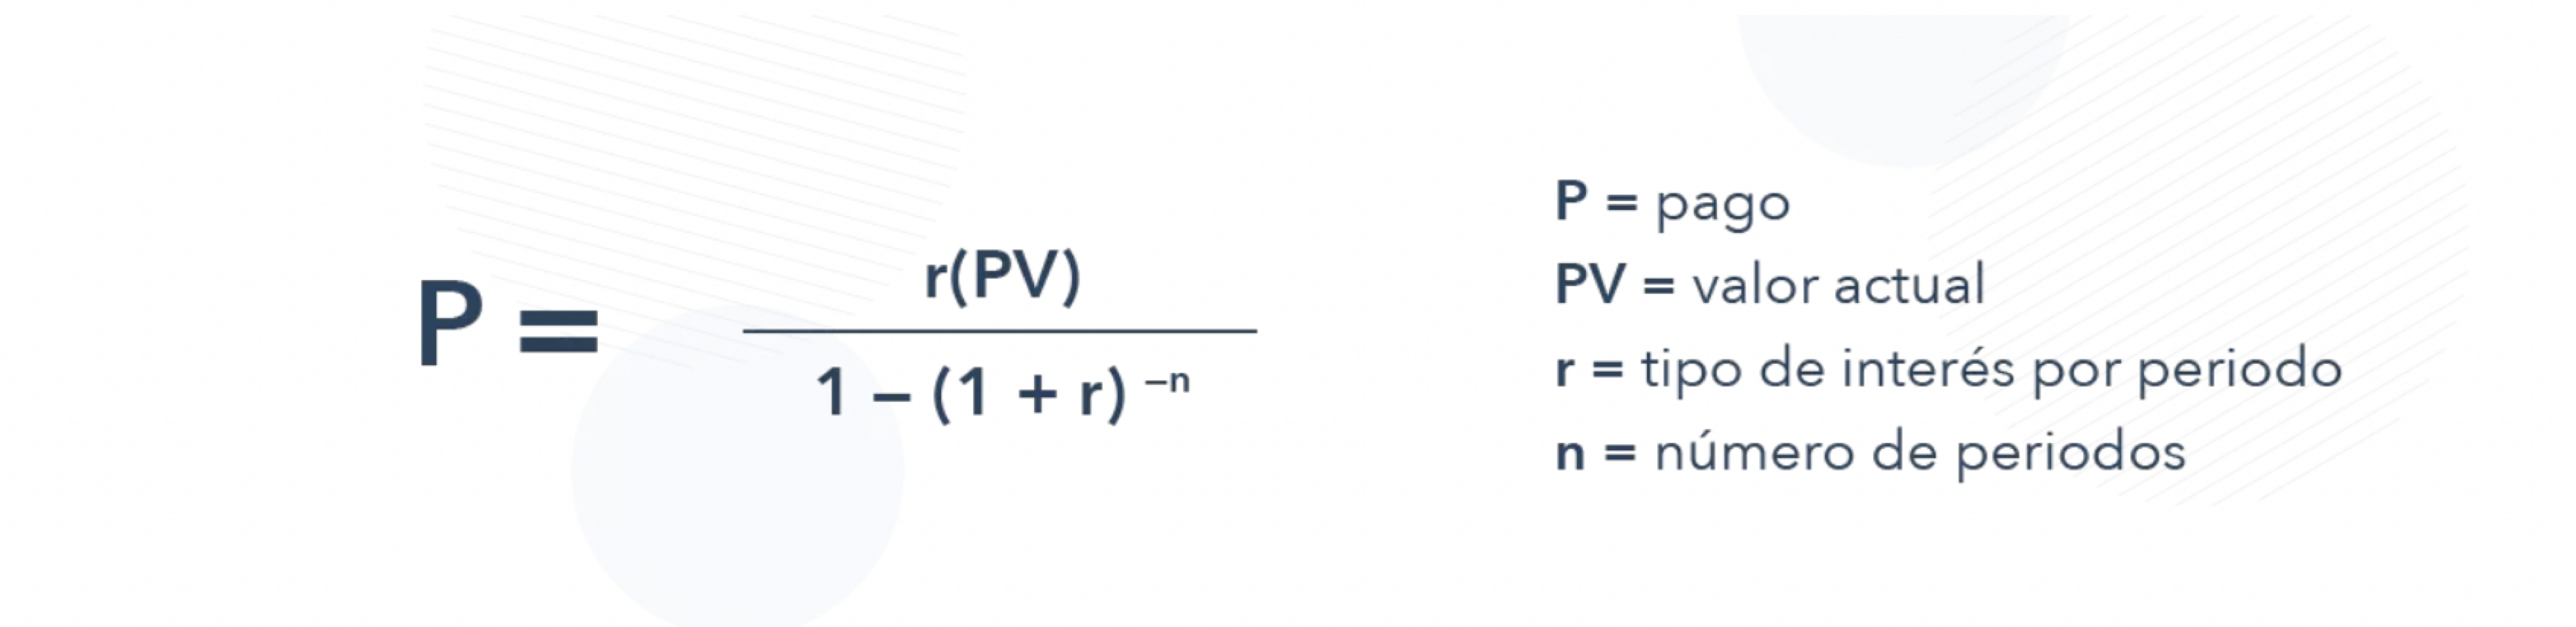

In [ ]:
class Loan:
    loan_amount: float
    interest_rate: float
    term_years: int
    currency: str

    def __init__(self, loan_amount: float, interest_rate: float, term_years: int, currency: str = "USD"):
        self.loan_amount = loan_amount
        self.interest_rate = interest_rate
        self.term_years = term_years
        self.currency = currency

    def __del__(self): ## special function of a class
        print("Loan has been destroyed")

    def __str__(self) -> str:
        # Loan(Amount: 1000000 COP, Interest Rate: 20%, Term: 1 year(s), Currency: COP)
        return f"Loan(Amount: {self.loan_amount} {self.currency}, Interest Rate: {self.interest_rate}%, Term: {self.term_years} year(s), Currency: {self.currency})"

    # Obtener pago mensual
    def get_monthly_payment(self) -> float:
        rate = self.interest_rate / 12 / 100 # Simple Interest
        n = self.term_years * 12
        payment = (self.loan_amount * rate) / (1 - (1 + rate) ** -n)
        return payment

    # Obtener pago total
    def get_total_payment(self) -> float:
        return self.get_monthly_payment() * 12 * self.term_years

    # Pagar
    def pay(self, amount: float) -> None:
        if amount > 0 and amount <= self.loan_amount:
            # self.loan_amount = self.loan_amount - amount
            self.loan_amount -= amount
            print(f"Paid {amount} {self.currency}. The new balance is {self.loan_amount} {self.currency}")
        else:
            raise Exception("Payment must be positive and less equal than the amount you currently owe")

    def not_implemented(self) -> None:
        raise NotImplementedError("Method Not Implemented Yet")

currency = "COP"
loan = Loan(loan_amount=1000000, interest_rate=20, term_years=1, currency=currency)
print("Your Loan is:", loan)
loan2 = Loan(loan_amount=3000, interest_rate=10, term_years=3)
del loan2

monthly_payment = loan.get_monthly_payment()
print(f"Your monthly payment is: {monthly_payment:.2f} {currency}")
total_payment = loan.get_total_payment()
print(f"Your total payment is: {total_payment:.2f} {currency}")

# Let's pay!
loan.pay(450000)
print("The current state of the loan is:", loan)

#loan.not_implemented()

Your Loan is: Loan(Amount: 1000000 COP, Interest Rate: 20%, Term: 1 year(s), Currency: COP)
Loan has been destroyed
Your monthly payment is: 92634.51 COP
Your total payment is: 1111614.07 COP
Paid 450000 COP. The new balance is 550000 COP
The current state of the loan is: Loan(Amount: 550000 COP, Interest Rate: 20%, Term: 1 year(s), Currency: COP)


# 1.2.2.2. Atributo "self" (this)

El atributo self es un parámetro especial utilizado en las clases. Se refiere a la instancia de la clase sobre la cual se está llamando el método. En otras palabras, self permite acceder a los atributos y otros métodos de la misma instancia dentro de la clase.

In [ ]:
class Employee:
    name: str

    def get_employee_info(self):
        print("employee info", self)

    def set_name(self, emplName: str):
        self.name = emplName

employee = Employee()
employee.get_employee_info() #Employee.get_employee_info(employee)
# is the same as:
Employee.get_employee_info(employee)
employee.set_name("John")
print(employee.name)

employee info <__main__.Employee object at 0x7d10187aeb90>
employee info <__main__.Employee object at 0x7d10187aeb90>
John


# 1.2.2.3. Ejemplo: Modelando una acción

In [ ]:
class Stock:
    symbol: str
    company_name: str
    price: float

    def __init__(self, symbol: str, company_name: str, price: float):
        self.symbol = symbol
        self.company_name = company_name
        self.price = price

    def __str__(self) -> str:
        # Stock(AAPL, Aple, Price: 150.0)
        return f"Stock({self.symbol}, {self.company_name}, Price: {self.price})"

    def update_price(self, price: float) -> None:
        self.price = price

apple_stock = Stock("AAPL", "Aple Inc.", 150)
apple_stock.update_price(155.3)
print(apple_stock)

Stock(AAPL, Aple Inc., Price: 155.3)


In [ ]:
possible_zip_codes = {
    "Sabaneta": [1, 2, 3, 4],
    "Medellín": [1, 2],
    "Rionegro": [20]
}

person_array = [possible_zip_codes]
print(person_array)

[{'Sabaneta': [1, 2, 3, 4], 'Medellín': [1, 2], 'Rionegro': [20]}]


# 1.2.2.4. Ejemplo: Modelando una cuenta bancaria

In [ ]:
import uuid
# id = 8numeros-4numeros-4numeros-4numeros-12digitos

class BankAccount:
    account_id: str
    account_holder: str
    balance: str

    def __init__(self, account_holder: str, initial_balance: float = 0):
        # self.account_id = f"account-{str(random.randint(1, 99999999))}" #account-234325
        self.account_id = f"acc0unt-{uuid.uuid4()}"
        self.account_holder = account_holder
        self.balance = initial_balance

    def __str__(self):
        return f"BankAccount(ID: {self.account_id}, Account Holder: {self.account_holder}, Balance: {self.balance})"

    def deposit(self, amount: float) -> None:
        #self.balance = self.balance + amount
        if not isinstance(amount, (int, float)):
            raise Exception("Invalid data type")
        if amount > 0:
            self.balance += amount
            print(f"Deposited ${amount}. The new balance is {self.balance}")
        else:
            raise Exception("Deposit amount must be postive")

    def withdraw(self, amount: float) -> None:
        if not isinstance(amount, (int, float)):
            raise Exception("Invalid data type")
        if amount > 0 and amount <= self.balance:
            self.balance -= amount
            print(f"Withdrew ${amount}. The new balance is {self.balance}")
        else:
            raise Exception("Withdrawal amount must be positive and less equal than the current balance")


print("-----JOHN'S BANK ACCOUNT-----")
account = BankAccount(account_holder="John", initial_balance=1000000) #this executes the constructor __init__
print(account)
account.deposit(375000)
print(account)
account.withdraw(500000)
print(account)
account.withdraw(30000)
print(account)
print("The account ID is:", account.account_id)

print("-----MR. DOE'S BANK ACCOUNT-----")
does_account = BankAccount("Mr. Doe", initial_balance=3000000)
print(does_account)

-----JOHN'S BANK ACCOUNT-----
BankAccount(ID: acc0unt-3c138ac2-876e-4615-a660-2236c8fe41c5, Account Holder: John, Balance: 1000000)
Deposited $375000. The new balance is 1375000
BankAccount(ID: acc0unt-3c138ac2-876e-4615-a660-2236c8fe41c5, Account Holder: John, Balance: 1375000)
Withdrew $500000. The new balance is 875000
BankAccount(ID: acc0unt-3c138ac2-876e-4615-a660-2236c8fe41c5, Account Holder: John, Balance: 875000)
Withdrew $30000. The new balance is 845000
BankAccount(ID: acc0unt-3c138ac2-876e-4615-a660-2236c8fe41c5, Account Holder: John, Balance: 845000)
The account ID is: acc0unt-3c138ac2-876e-4615-a660-2236c8fe41c5
-----MR. DOE'S BANK ACCOUNT-----
BankAccount(ID: acc0unt-a0d2a589-c5e6-4192-9bb9-47faad04d944, Account Holder: Mr. Doe, Balance: 3000000)


# 1.2.2.5. Atributos públicos, protegidos y privados (encapsulamiento)

Privados: accesibles dentro de la misma clase
Protegidos: accesbles dentro de la misma clase y las clases hijas
Públicos: accesibles incluso por fuera de la clase

In [ ]:
class Employee:
    name: str
    _id: str
    __salary: int

    def __init__(self, name: str, id: str, salary: int):
        self.name = name
        self._id = id
        self.__salary = salary

    def __str__(self):
        return f"Employee(name: {self.name}, ID: {self._id})"

    def get_salary(self) -> int:
        return self.__salary

employee = Employee("John", "123", 1000)
print(employee)
print("Name:", employee.name)
print("ID:", employee._id)
print("Salary:", employee.get_salary())
print("Salary from outside (trick):", employee._Employee__salary)

Employee(name: John, ID: 123)
Name: John
ID: 123
Salary: 1000
Salary from outside (trick): 1000


# 1.2.2.6. Métodos de instancia y métodos estáticos (decorador @staticmethod)

**Método de instancia:** Realiza operaciones sobre el objeto y por tanto requiere la palabra "self" para acceder a los métodos y atributos de éste

**Método estático:** NO requiere de "self" ya que se usa para realizar operaciones independientes a los atributos de la instancia de la clase

Ilustremos ésto con un ejemplo:


In [ ]:
class Calculator:
    brand: str
    model: str | None

    def __init__(self, brand: str, model: str | None = None):
        self.brand = brand
        self.model = model

    def __str__(self):
        return f"Calculator(Brand: {self.brand}, Model: {self.model})"

    @staticmethod
    def sum(a: float, b: float) -> float:
        return a + b

    @staticmethod
    def diffence(a: float, b: float) -> float:
        return a - b

    @staticmethod
    def multiply(a: float, b: float) -> float:
        return a * b

    @staticmethod
    def division(a: float, b: float) -> float:
        if b == 0:
            raise ValueError("Division by zero is not defined")
        return a / b

calculator = Calculator("Casio", "-version1")
print(calculator)

# Uses directly the class to call the function - static method
sum2 = Calculator.sum(5, 2)
#Employee.get_employee_info()
print("sum2:", sum2)

Calculator(Brand: Casio, Model: -version1)
sum2: 7


# 1.3.0. Conceptos fundamentales en Programación Orientada a Objetos

1. Herencia
2. Abstracción
3. Encapsulamiento
4. Polimorfismo

# 1.3.1. Herencia y polimorfismo

La herencia permite crear una nueva clase a partir de una clase existente, que hereda los atributos y métodos de la clase base. permite la reutilización de código y estable relaciones entre clases y objetos.

El polimorfismo por su parte permite que objetos de diferentes clases, pero pertenecientes a una clase común tengan su propia implementación.

In [ ]:
class LivingBeing:
    name: str

    def __init__(self, name: str):
        self.name = name
        self.be_born()

    def be_born(self) -> None:
        pass

    def make_sound(self) -> None:
        pass

    def die(self) -> None:
        pass

class Human(LivingBeing):
    def make_sound(self) -> None:
        print("Hi, my name is", self.name)

    def be_born(self) -> None:
        print(f"The human {self.name} was born")

    def die(self) -> None:
        print(f"The human {self.name} has died\n")

class Cat(LivingBeing):
    def make_sound(self) -> None:
        print("Miau!")

    def be_born(self) -> None:
        print(f"The cat {self.name} was born")

    def die(self) -> None:
        print(f"The cat {self.name} has died\n")

human = Human("John")
human.make_sound()
human.die()

cat = Cat("Kitty")
cat.make_sound()
cat.die()

The human John was born
Hi, my name is John
The human John has died

The cat Kitty was born
Miau!
The cat Kitty has died



# 1.3.1.1. Herencia y la función "super"

Se asegura que el constructor de la super clase se ejecute, esto asegura la iniciación correcta de todos los métodos y atributos de la clase

In [ ]:
class LivingBeing:
    name: str

    def __init__(self, name: str):
        self.name = name
        self.be_born()

    def be_born(self) -> None:
        pass

    def make_sound(self) -> None:
        pass

    def die(self) -> None:
        pass

class Human(LivingBeing):
    def make_sound(self, message: str = "Hello"):
        print(message)


class Mutant(LivingBeing):
    super_power: str

    def __init__(self, name: str, super_power: str):
        super().__init__(name)
        self.super_power = super_power

    def make_sound(self) -> None:
        print("Arrrr!")

human = Human("John")
human.make_sound("Hi")

wolverine = Mutant("Wolverine", "Adamantium Claws")
wolverine.make_sound()
print(wolverine.name)

Hi
Arrrr!
Wolverine


# 1.3.1.2. Sobrecarga de Métodos

Del ejemplo anterior, make_sound tiene una implementación propia y distinta para Human y para Mutant. Es decir, comparten el nombre pero no su funcionalidad. A esto se le llama **sobrecarga de métodos**.

# 1.3.1.3. Herencia multinivel

In [ ]:
class MusicalInstrument:
    brand: str

    def __init__(self, brand: str):
        self.brand = brand

class StringInstrument(MusicalInstrument):
    model: str

    def __init__(self, brand: str, model: str):
        super().__init__(brand)
        self.model = model

class Guitar(StringInstrument):
    numberOfStrings: int

    def __init__(self, brand: str, model: str, numberOfStrings: int = 6):
        super().__init__(brand, model)
        self.numberOfStrings = numberOfStrings

    def __str__(self) -> str:
        return f"Guitar(Brand: {self.brand}, Model: {self.model}, Number of Strings: {self.numberOfStrings})"

guitar = Guitar(brand="Gibson", model="Les Paul", numberOfStrings=6)
print(guitar)

Guitar(Brand: Gibson, Model: Les Paul, Number of Strings: 6)


# 1.3.1.4. Herencia Múltiple y Problema del Diamante

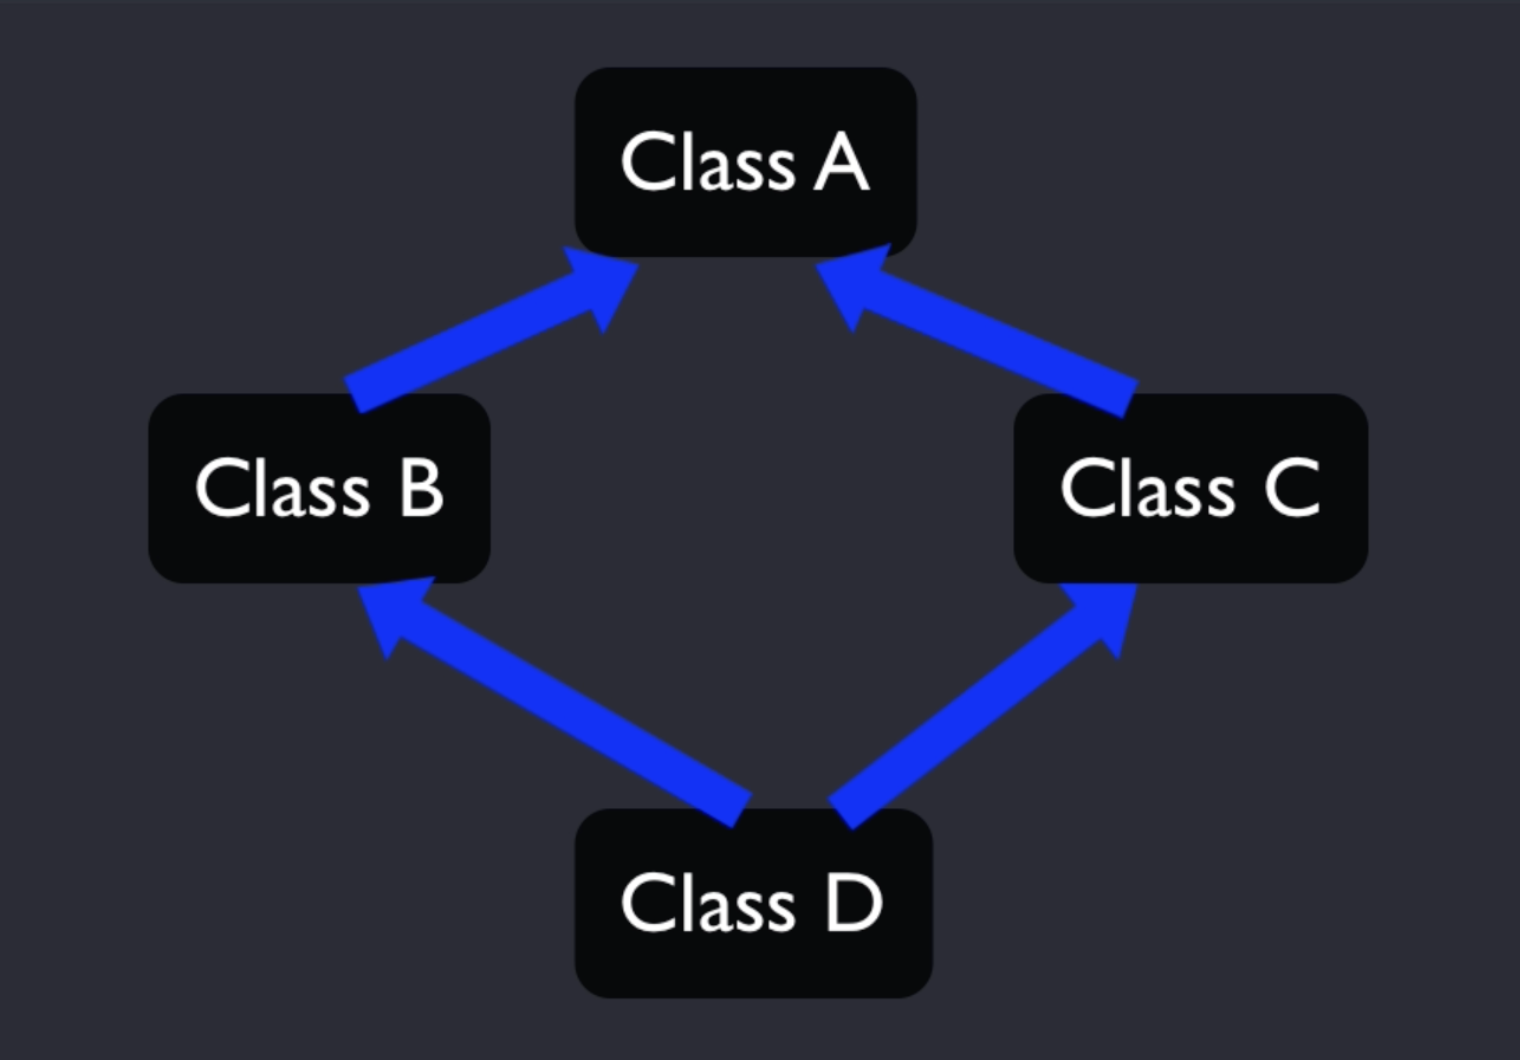

In [ ]:
class A:
    def method(self):
        print("This method belongs to A")

class B(A):
    def method(self):
        pass

class C(A):
    def method(self):
        pass

class D(B, C):
    def method(self):
        pass

# 1.3.1.4.1. Caso 1: Sin sobrecargar el método en clase B ni clase C

In [ ]:
class A:
    def method(self):
        print("This method belongs to A")

class B(A):
    pass

class C(A):
    pass

class D(B, C):
    pass

d = D()
d.method()

This method belongs to A


# 1.3.1.4.2. Caso 2: Sobrecargando el método en clase B pero no en clase C

In [ ]:
class A:
    def method(self):
        print("This method belongs to A")

class B(A):
    def method(self):
        print("This method belongs to B")

class C(A):
    pass

class D(B, C):
    pass

d = D()
d.method()

This method belongs to B


# 1.3.1.4.3. Caso 3: Sobrecargando el método en clase C pero no en clase B

In [ ]:
class A:
    def method(self):
        print("This method belongs to A")

class B(A):
    pass

class C(A):
    def method(self):
        print("This method belongs to C")

class D(B, C):
    pass

d = D()
d.method()

This method belongs to C


# 1.3.1.4.4. Caso 4: Sobrecargando el método en ambas clases B y C

In [ ]:
class A:
    def method(self):
        print("This method belongs to A")

class B(A):
    def method(self):
        print("This method belongs to B")

class C(A):
    def method(self):
        print("This method belongs to C")

class D(B, C):
    pass

d = D()
d.method()

# D -> B -> C -> A

This method belongs to B


# 1.3.1.4.5. Resolución del problema:
Python crea una lista de clases que se buscan de izquierda a derecha y de abajo a arriba (D, B, A, C, A) y luego elimina todas las apariciones de una clase repetida menos la última. Por lo que, el orden de resolución del método es: D, B, C, A.

**Por éste tipo de confusiones, es mejor evitar la herencia múltiple y muchos lenguajes (como Java, TypeScript, Go, Rust o C#) no lo permiten por defecto!**

# 1.3.2. Sobrecarga de Operadores

Los operadores en Python están definidos por funciones especiales, escribiendo la implementación explícita de éstas funciones podemos reemplazar el comportamiento de los operadores para distintas clases que construyamos.

Las funciones especiales correspondientes a los operadores +, -, * y / son: __ add __ , __ sub __ , __ mul __ y __ truediv __

In [ ]:
# +, -, *, / => __add__, __sub__, __mul__, __truediv__
a = 3
b = 5

a + b

8

In [ ]:
class Square:
    side: int

    def __init__(self, side: int):
        self.side = side

    def __sub__(square1, square2):
        return (4 * square1.side) - (4 * square2.side)

square_one = Square(side=5)
square_two = Square(side=10)
result = square_one - square_two
print("Result:", result)

Result: -20


# 1.3.3. Abstracción y Encapsulamiento


Encapsulamiento: Se refiere a oculta los detalles o procesos internos de una clase y exponer solo las definiciones. De tal forma, que su definición sea abstracta y dependa de cada caso particular.

Abstracción: La abstracción consiste en tener clases que definan métodos que deben ser implementados por otras clases, pero sin éstas tener la implementación directa. Éstas clases tampoco deben poder instanciar objetos.
Básicamente, una clase abstracta define los métodos, y por medio de herencia, construimos otras clases que tendrán las implementaciones de dichos métodos.

NOTA: Para poder implementar abstracción forzada en Python debemos usar el paquete de abc (Abstract Base Classes package) que define la infrastructura para poder implementar abstracción.

Consideremos el siguiente ejemplo: construir una clase para cuadrado y otra para rectángulo, formas geométricas que comparten el hecho de que sobre ellas se puede calcular el área:

In [ ]:
#abstract base class

from abc import ABC, abstractmethod

class Shape(ABC):

    @abstractmethod
    def area(self):
        pass

class Square(Shape):
    side: int

    def __init__(self, side: int):
        self.side = side

    def area(self) -> int:
        return self.side * self.side

class Rectangle(Shape):
    width: int
    height: int

    def __init__(self, a: int, b: int):
        self.width = a
        self.height = b

    def area(self) -> int:
        return self.width * self.height

square = Square(4)
print("Square area:", square.area())

rectangle = Rectangle(a=3, b=7)
print("Rectangle area:", rectangle.area())

Square area: 16
Rectangle area: 21


Nota: La clase abstracta no debería poder inicializar o crear objetos por si misma

In [ ]:
shape = Shape()

TypeError: Can't instantiate abstract class Shape with abstract method area

# 1.4. Taller Práctico (30 min)
Retomando la clase Préstamo (Loan) vista anteriormente, queremos construir la tabla de amortización de éste.

1. Construir un método llamado amortization_table que retorne una lista de listas con cada una de los siguientes valores: [saldo de la cuota, interés pagado, principal pagado]

2. Construir un objeto de la clase préstamo con los siguientes valores:\
Valor a prestar = 10000 USD, tasa de interés = 5%, término = 2 años.

3. Imprimir el objeto en formato: Loan(Amount: 10000 USD, Interest Rate: 5%, Term: 2 year(s), Currency: USD)

2. Usando éste objeto, calcular e imprimir la tabla usando la función print y que quede con el formato indicado.

**Salida esperada del programa:**

Loan(Amount: 10000 USD, Interest Rate: 5%, Term: 2 year(s))

Mes 1: Saldo: $9602.95, Interés: $41.67, Pagado: $397.05

Mes 2: Saldo: $9204.25, Interés: $40.01, Pagado: $398.70

Mes 3: Saldo: $8803.89, Interés: $38.35, Pagado: $400.36

Mes 4: Saldo: $8401.86, Interés: $36.68, Pagado: $402.03

Mes 5: Saldo: $7998.15, Interés: $35.01, Pagado: $403.71

Mes 6: Saldo: $7592.76, Interés: $33.33, Pagado: $405.39

Mes 7: Saldo: $7185.69, Interés: $31.64, Pagado: $407.08

Mes 8: Saldo: $6776.91, Interés: $29.94, Pagado: $408.77

Mes 9: Saldo: $6366.44, Interés: $28.24, Pagado: $410.48

Mes 10: Saldo: $5954.25, Interés: $26.53, Pagado: $412.19

Mes 11: Saldo: $5540.34, Interés: $24.81, Pagado: $413.90

Mes 12: Saldo: $5124.71, Interés: $23.08, Pagado: $415.63

Mes 13: Saldo: $4707.35, Interés: $21.35, Pagado: $417.36

Mes 14: Saldo: $4288.25, Interés: $19.61, Pagado: $419.10

Mes 15: Saldo: $3867.41, Interés: $17.87, Pagado: $420.85

Mes 16: Saldo: $3444.81, Interés: $16.11, Pagado: $422.60

Mes 17: Saldo: $3020.45, Interés: $14.35, Pagado: $424.36

Mes 18: Saldo: $2594.32, Interés: $12.59, Pagado: $426.13

Mes 19: Saldo: $2166.41, Interés: $10.81, Pagado: $427.90

Mes 20: Saldo: $1736.73, Interés: $9.03, Pagado: $429.69

Mes 21: Saldo: $1305.25, Interés: $7.24, Pagado: $431.48

Mes 22: Saldo: $871.97, Interés: $5.44, Pagado: $433.28

Mes 23: Saldo: $436.89, Interés: $3.63, Pagado: $435.08

Mes 24: Saldo: $0.00, Interés: $1.82, Pagado: $436.89

In [ ]:
class Loan:
    loan_amount: float
    interest_rate: float
    term_years: int
    currency: str

    def __init__(self, loan_amount: float, interest_rate: float, term_years: int, currency: str = "USD"):
        self.loan_amount = loan_amount
        self.interest_rate = interest_rate
        self.term_years = term_years
        self.currency = currency

    def __str__(self) -> str:
        # Loan(Amount: 1000000 COP, Interest Rate: 20%, Term: 1 year(s), Currency: COP)
        return f"Loan(Amount: {self.loan_amount} {self.currency}, Interest Rate: {self.interest_rate}%, Term: {self.term_years} year(s))"

    # Obtener pago mensual
    def get_monthly_payment(self) -> float:
        rate = self.interest_rate / 12 / 100 # Simple Interest
        n = self.term_years * 12
        payment = (self.loan_amount * rate) / (1 - (1 + rate) ** -n)
        return payment

    # Obtener pago total
    def get_total_payment(self) -> float:
        return self.get_monthly_payment() * 12 * self.term_years

    # Pagar
    def pay(self, amount: float) -> None:
        if amount > 0 and amount <= self.loan_amount:
            # self.loan_amount = self.loan_amount - amount
            self.loan_amount -= amount
            print(f"Paid {amount} {self.currency}. The new balance is {self.loan_amount} {self.currency}")
        else:
            raise Exception("Payment must be positive and less equal than the amount you currently owe")

    def amortization_table(self):
        current_balance: float = self.loan_amount
        table: list = []
        monthly_payment = self.get_monthly_payment()

        for month in range(self.term_years * 12):
            interests_paid: float = current_balance * self.interest_rate / 12 / 100
            paid: float = monthly_payment - interests_paid
            current_balance = current_balance - paid
            row = [current_balance if current_balance > 0 else 0, interests_paid, paid]
            table.append(row)

        return table

# Valor a prestar = 10000 USD, tasa de interés = 5%, término = 2 años
loan = Loan(loan_amount=10000, interest_rate=5, term_years=2, currency="USD")
print(loan)
table = loan.amortization_table()

time_in_months = loan.term_years * 12 # 24
for month in range(time_in_months): # 0, 1, 2, 3, ..., 23
    row = table[month]
    # balance = row[0]
    # interests_paid = row[1]
    # paid = row[2]
    # shorter form
    [balance, interests_paid, paid] = row
    # Mes 1: Saldo: $9602.95, Interés: $41.67, Pagado: $397.05
    print(f"Mes {month + 1}: Saldo: ${balance:.2f}, Interés: ${interests_paid:.2f}, Pagado: ${paid:.2f}")

Loan(Amount: 10000 USD, Interest Rate: 5%, Term: 2 year(s))
Mes 1: Saldo: $9602.95, Interés: $41.67, Pagado: $397.05
Mes 2: Saldo: $9204.25, Interés: $40.01, Pagado: $398.70
Mes 3: Saldo: $8803.89, Interés: $38.35, Pagado: $400.36
Mes 4: Saldo: $8401.86, Interés: $36.68, Pagado: $402.03
Mes 5: Saldo: $7998.15, Interés: $35.01, Pagado: $403.71
Mes 6: Saldo: $7592.76, Interés: $33.33, Pagado: $405.39
Mes 7: Saldo: $7185.69, Interés: $31.64, Pagado: $407.08
Mes 8: Saldo: $6776.91, Interés: $29.94, Pagado: $408.77
Mes 9: Saldo: $6366.44, Interés: $28.24, Pagado: $410.48
Mes 10: Saldo: $5954.25, Interés: $26.53, Pagado: $412.19
Mes 11: Saldo: $5540.34, Interés: $24.81, Pagado: $413.90
Mes 12: Saldo: $5124.71, Interés: $23.08, Pagado: $415.63
Mes 13: Saldo: $4707.35, Interés: $21.35, Pagado: $417.36
Mes 14: Saldo: $4288.25, Interés: $19.61, Pagado: $419.10
Mes 15: Saldo: $3867.41, Interés: $17.87, Pagado: $420.85
Mes 16: Saldo: $3444.81, Interés: $16.11, Pagado: $422.60
Mes 17: Saldo: $3020.